In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv("input/trainset.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

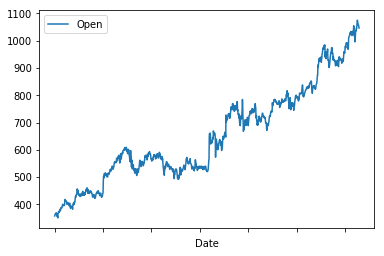

In [3]:
trainset = dataset_train.iloc[:, 1:2].values #Selecting Open column
dataset_train.plot(x="Date", y="Open")
trainset

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_scaled = sc.fit_transform(trainset)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [5]:
training_scaled.shape

(1259, 1)

In [6]:
x_train_ = []
y_train_ = []

for i in range(60,1259):
    x_train_.append(training_scaled[i-60:i, 0])
    y_train_.append(training_scaled[i,0])
x_train,y_train = np.array(x_train_),np.array(y_train_)

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1199, 60, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))


In [10]:
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [16]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1199/1199 [==============================] - 9s 8ms/step - loss: 0.0280
Epoch 2/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 3/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 4/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 5/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0034
Epoch 6/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0031
Epoch 7/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0031
Epoch 8/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0033
Epoch 9/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0032
Epoch 10/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0030
Epoch 11/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 12/100
1199/1199 [==============================] - 7s 6ms/step - lo

1199/1199 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 98/100
1199/1199 [==============================] - 8s 7ms/step - loss: 9.9685e-04
Epoch 99/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 100/100
1199/1199 [==============================] - 7s 6ms/step - loss: 9.6585e-04


In [17]:
dataset_test = pd.read_csv("input/testset.csv")

In [18]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)

In [20]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

185

In [28]:
inputs = inputs.reshape(-1, 1)
#inputs

In [22]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [23]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [24]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [25]:
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

In [29]:
#predicted_price

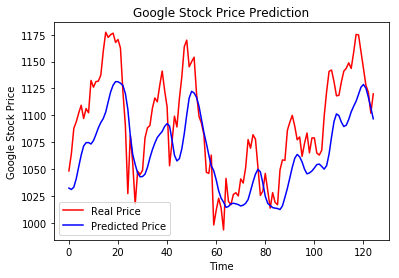

In [27]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()